# Deep Learning and optimizers

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to optimize the loss functions. 

Adaptive optimizers like Adam are a default choice for training neural networks. However, debates arise when aiming for state-of-the-art results. Researchers often discuss model generalization. This leads to having new optimizers and variants frequently, e.g. _AdamW_ or _RAdam_.

In this chapter, we discuss the various main optimizers and explore their differences.

# Families of optimizers

## Gradient Descent (GD)

Gradient Descent (GD) is the most basic but most used optimization algorithm. It’s used heavily in linear regression and classification algorithms. Backpropagation in neural networks also uses a gradient descent algorithm.

Gradient descent is a first-order optimization algorithm: it dependents on the first order derivative of the loss function. Through backpropagation, the loss is transferred from one layer to another and the model’s parameters also known as weights are modified depending on the losses so that the loss can be minimized.

GD is easy to compute, implement and understand.

But it can easily be trapped in local minima.
The weights are updated after calculating gradients on the whole dataset. So, if the dataset is large this may take forever to iterate enough to reach convergence. A consequence is also that GD requires large memory to calculate gradient on the whole dataset.

**Algorithm**

$$W \leftarrow W - \eta \nabla L(W)$$

## Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent is a variant of Gradient Descent that attempts to update the model’s parameters more frequently: SGD updates the model parameters after computation of loss on each training example. 
As a result, parameters have high variance and fluctuations in loss functions at different intensities.

Because of the high update rate of the model parameters, SGD converges faster than Gradient Descent, requires less memory.
However, SGD is not guaranteed to converge to the global minimum of the loss function. It may even move away from it.

**Algorithms:**

$$ W \leftarrow W - \eta \nabla L(W, x(i), y(i)),$$

where $\{x(i) ,y(i)\}$ are the training examples.


## Mini-Batch Gradient Descent

Mini-Batch GD is one of the best among all the variations of gradient descent algorithms. It is an improvement on both SGD and GD. It updates the model parameters after every batch/chunks of training data. So, the dataset is divided into various batches and after every batch, the parameters are updated.

It still frequently updates the model parameters, but with the batches it reduces the variance of the parameters. However, it is also not guaranteed to converge to the global minimum of the loss function.

**Algorithms:**

$$ W \leftarrow W - \eta \nabla L(W, {x, y}_{k}),$$

where $\{x, y\}_{k}$ are the batches of training set.


```{admonition} Challenges of Gradient Descent methods

The method rely on a learning rate which strongly impacts the optimization. 
If the learning rate is too small, it may take ages to converge. If the learning rate is too large, the variance in the parameters will increase with time (exploding updates), and the convergence will not reach the optimal solution.

Also GDs have a constant learning rate for all the parameters. Depending on the problem, if could be sub-optimal
```

## Momentum

Momentum is an optimization algorithm that uses a moving average of past gradients to accelerate convergence. It is often used in deep learning algorithms as a solution to the high variance in SGD. 

It accelerates the convergence towards the relevant direction and reduces the fluctuation to the irrelevant direction. One more hyperparameter is used in this method known as momentum $\gamma$.

As a result, the Momentum optimizer reduces the oscillations and high variance of the parameters, which speeds up convergence. However, it has two hyperparameters: $\gamma$ and $\eta$. In addition, when the momentum gets too high, the algorithm may miss the local minima and may continue to rise up.

**algorithm**

$$\begin{align}
V(t) \leftarrow & \gamma V(t−1) + \eta \nabla L(W)\\
W(t) \leftarrow & W - V(t)
\end{align}$$

$\gamma$ is typically set to 0.9.


## Nesterov momentum or Nesterov Accelerated Gradient (NAG)

This method attempts to remove the oscillations and high variance of the parameters from the momentum algorithm.
This method essentially anticipates by using updated weights with the current potential $W - V(t-1)$ when updating the potential $V$. 

**algorithm**

$$\begin{align}
V(t) \leftarrow & \gamma V(t−1) + \eta \nabla L(W - \gamma V(t-1))\\
W(t) \leftarrow & W - V(t)
\end{align}$$

## AdaGrad

Optimizers rely on a constant learning rate for all parameters and optimization iteration to update the weights of the model.
AdaGrad is an adaptive grandient decent method that changes the learning rate $\eta$ for each parameter and at every time step $t$. It is a second order optimization working on the derivatives of an error function.

**Algorithm:**

$$\begin{align}
W(t + 1, i) \leftarrow& W(t, i) - \eta(t) \frac{\partial L}{\partial W(t,i)} \\
\eta(t) =& \frac{\eta}{\sqrt{\alpha(t) + \epsilon}}
\end{align}$$

Here the $\alpha(t)$ denotes the different learning rates at each iteration, $\eta$ is a constant, and $\epsilon$ is a small positive to avoid division by 0.


The main benefit of using Adagrad is that it abolishes the need to modify the learning rate manually. It is more reliable than gradient descent algorithms and their variants, and it reaches convergence at a higher speed.
However, the AdaGrad optimizer decreases the learning rate aggressively and monotonically. There might be a point when the learning rate becomes too small to learn more, and hence the accuracy of the model is compromised.

```{tip} 
_AdaDelta_ is a variant of AdaGrad that limits the window of accumulated past gradients to slows down the learning rate decay
```

## Root Mean Square Propagation or RMSProp

RMSProp is an optimization algorithm that also adapts the learning rate. It divides the learning rate for a weight by a running average of the magnitudes of recent gradients for that weight.

$$\begin{align}
V(W,t) \leftarrow& \gamma V(W, t-1) + (1 - \gamma)(\nabla Q_i(W))^2\\
W \leftarrow& W - \frac{\eta}{\sqrt{V(W,t)}}\nabla Q_i(W)
\end{align}$$

where, $\gamma$ is the forgetting factor. 

The concept of storing the historical gradient as sum of squares is borrowed from Adagrad, but $\gamma$  decreasing the influence of old data solving Adagrad's diminishing learning rates.

## Adam

Adam (Adaptive Moment Estimation) optimization algorithm is a further extension of SGD to update network weights during training. Unlike maintaining a single learning rate through training in SGD, Adam optimizer updates the learning rate for each network weight individually. Adam works with momentums of first and second order to take the benefits of AdaGrad and RMSProp algorithms.

TODO: Add equations.

Adam is fast, rectifies vanishing learning rate from AdaGrad and RMSProp and controls th high variance of the parameters.

```{tip}
Adam is a popular optimization algorithm due to its ability to converge quickly and handle noisy or sparse gradients. Additionally, it does not require manual tuning of hyperparameters like the learning rate decay or momentum coefficient, making it easier to use than other optimization algorithms.
```

## Tuning Adam optimizers

Because Adam is very popular and it is a good choice for training neural networks, we focus on building understanding of tuning its parameters: learning rate, exponential decay rate for the momentum term, and learning rate decay.

### Learning rate

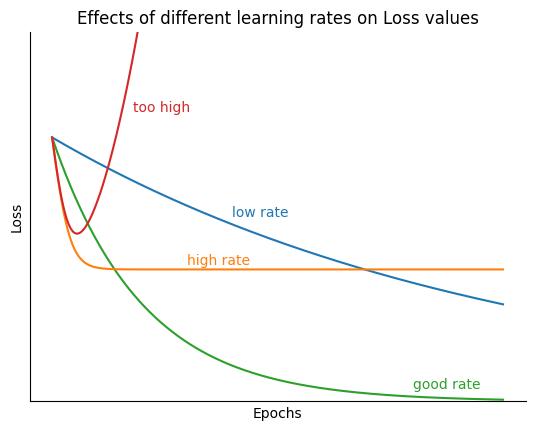

In [68]:
%matplotlib inline
import pylab as plt
import numpy as np

epochs = np.arange(10_000)

eta = 5e-4
plt.plot(epochs, np.exp(- epochs * eta), label='good', color='C2')
plt.text(8000, 0.05, 'good rate', color='C2')
eta = 1e-4
plt.plot(epochs, np.clip(np.exp(- epochs * eta), 1e-1, 10), label='low', color='C0')
plt.text(4000, 0.7, 'low rate', color='C0')
eta = 5e-3
plt.plot(epochs, 1.5 - 1 / (1 + np.exp(- epochs * eta)), label='high', color='C1')
plt.text(3000, 0.52, 'high rate', color='C1')
plt.plot(epochs, (1.5 - 1 / (1 + np.exp(- epochs * eta))) + (eta * epochs / 10) ** 2, label='high', color='C3')
plt.text(1800, 1.1, 'too high', color='C3')
plt.ylim(0, 1.4)
ax = plt.gca()
plt.setp(ax.get_xticklabels() + ax.get_yticklabels() + ax.get_xticklines() + ax.get_yticklines(),
         visible=False)
plt.setp([ax.spines['top'], ax.spines['right']], visible=False)
plt.xlabel('Epochs')
plt.ylabel('Loss');
plt.title('Effects of different learning rates on Loss values');

A small learning rate corresponds to updates and therefore a slower model training. i.e. it would require many updates to the parameters to reach the point of minima. On the other hand, a large learning rate would mean large steps to the parameters thus often tends to divergence instead of  convergence.

An optimal learning rate value (default value $0.001$) means that the optimizer would update the parameters just right to reach the local minima in a given number of epochs. Varying learning rate between $0.0001$ and $0.01$ is the typical range in most cases.

### momentum decay $(\beta_1, \beta_2)$
 
$\beta_1$ is the exponential decay rate for the momentum term. It’s default value in PyTorch is $0.9$ (from the original paper). 

$\beta_2$ is the exponential decay rate for velocity term. The default value is 0.999 in the PyTorch implementation. This value should be set as close to 1.0 as possible to help with sparse gradient.

### Learning Rate Decay
 
Learning rate decay decreases as the parameter values reach closer to the global optimal solution. This avoids overshooting the minima often resulting in faster convergence of the loss function. The PyTorch implementation refers to this as `weight_decay` with default value being zero.

### Epsilon
 
 Although not a tuning hyperparameter, it is a very tiny number to avoid any division by zero error in the implementation. The default value is $10^{-8}$.